# Convert Tactus xml files to csv files

In [1]:
import gzip
import matplotlib.pyplot as plt
import os
import pandas as pd
import re
import xml.etree.ElementTree as ET

In [2]:
CLIENT = "client"
COUNSELOR = "counselor"
DATADIR = "../usb/tmp/20190917/"
FILEPATTERN = "AdB.*xml.gz"

## Process tag AssignedCounselor

In [3]:
def dictToString(data):
    string = ""
    for key in sorted(data.keys()):
        string += key+":"+data[key]+" "
    return(string)

def fileNameToId(fileName):
    return(fileName.split(".")[0])

def readGzippedXmlFile(inFileName):
    inFile = gzip.open(inFileName)
    inFileContent = inFile.read()
    inFile.close()
    root = ET.fromstring(inFileContent)
    return(root)

In [4]:
COUNSELORQUERY = "./AssignedCounselor"
OUTFILENAME = "AssignedCounselor.csv"

inFileNames = sorted(os.listdir(DATADIR))
clients = {}
counselors = {"":0}
for inFileName in inFileNames:
    if re.search(FILEPATTERN,inFileName):
        root = readGzippedXmlFile(DATADIR+inFileName)
        for counselor in root.findall(COUNSELORQUERY):
            counselorData = {}
            for i in range(0,len(counselor)):
                try:
                    counselorData[counselor[i].tag.strip()] = counselor[i].text.strip()
                except: pass
        counselorString = dictToString(counselorData)
        if not counselorString in counselors: counselors[counselorString] = len(counselors)
        clients[fileNameToId(inFileName)] = counselors[counselorString]

In [5]:
counselorsDf = pd.DataFrame(clients,index=[0]).T.rename(columns={0:COUNSELOR})
counselorsDf.index.name = CLIENT
counselorsDf.to_csv(OUTFILENAME)

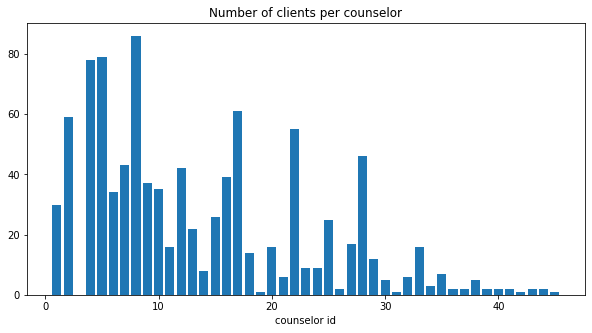

In [6]:
CODEEMPTY = 0
CODENOCOUNSELOR = 3 

counselorGroups = counselorsDf.groupby(COUNSELOR).groups
x = [c for c in sorted(counselorGroups.keys()) if c != CODEEMPTY and c != CODENOCOUNSELOR] 
y = [len(counselorGroups[g]) for g in x]
plt.figure(figsize=(10,5))
plt.bar(x,y)
plt.xlabel("counselor id")
plt.title("Number of clients per counselor")
plt.show()

In [7]:
{counselors[c]:c for c in counselors if counselors[c] == CODEEMPTY or counselors[c] == CODENOCOUNSELOR} 

{0: '',
 3: 'Email:alcoholdebaas@tactus.nl FirstName:Geen LastName:Hulpverlener '}